### 57.MobileNet Image Classification with TensorFlow's Keras API

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#check GPUs
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices, True)

Num GPUs Available:  0


In [15]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [16]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

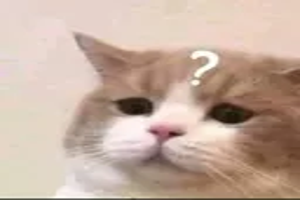

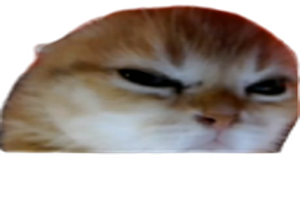

In [17]:
import os
import requests
from PIL import Image as PILImage
from IPython.display import display
folder = "data/MobileNet-samples"
os.makedirs(folder, exist_ok=True)

urls = [
    "https://cdn3.emoji.gg/emojis/5051-cat-confused.png",
    "https://www.pngall.com/wp-content/uploads/6/Ragdoll-Cat-PNG-180x180.png",
    "https://cdn3.emoji.gg/emojis/8960-mad-cat.png"
]

for i, url in enumerate(urls, start=1):
    response = requests.get(url)
    path = f"{folder}/{i}.PNG"
    with open(path, "wb") as f:
        f.write(response.content)

for i in range(1, 4):
    img = PILImage.open(f"{folder}/{i}.PNG")
    img = img.resize((300, 200))
    display(img)


In [18]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.PNG', width=300,height=200)

In [19]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


In [20]:
results = imagenet_utils.decode_predictions(predictions)

In [21]:
results

[[('n02124075', 'Egyptian_cat', np.float32(0.5567252)),
  ('n02123394', 'Persian_cat', np.float32(0.14376712)),
  ('n02123045', 'tabby', np.float32(0.08406448)),
  ('n03958227', 'plastic_bag', np.float32(0.06466522)),
  ('n02123159', 'tiger_cat', np.float32(0.054558422))]]

In [22]:
Image(filename='data/MobileNet-samples/2.PNG', width=300,height=200)

In [23]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[[('n02123597', 'Siamese_cat', np.float32(0.8530579)),
  ('n02123394', 'Persian_cat', np.float32(0.07114313)),
  ('n02127052', 'lynx', np.float32(0.035561744)),
  ('n02328150', 'Angora', np.float32(0.011834774)),
  ('n02123045', 'tabby', np.float32(0.0045029665))]]

In [24]:
Image(filename='data/MobileNet-samples/3.PNG', width=300,height=200)

In [25]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[[('n03832673', 'notebook', np.float32(0.19794883)),
  ('n03642806', 'laptop', np.float32(0.14302988)),
  ('n04286575', 'spotlight', np.float32(0.12703955)),
  ('n04152593', 'screen', np.float32(0.09406502)),
  ('n03782006', 'monitor', np.float32(0.066099994))]]

### 58.Fine-Tuning MobileNet on custom data set

In [26]:
os.getcwd()

'/content'

In [43]:
import os
import zipfile
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
uploaded = files.upload()

zip_path = "Sign-Language-Digits-Dataset-master.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")


base_dir = "Sign-Language-Digits-Dataset-master"
dataset_dir = f"{base_dir}/Dataset"

train_dir = f"{base_dir}/train"
valid_dir = f"{base_dir}/valid"
test_dir  = f"{base_dir}/test"

for folder in [train_dir, valid_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

for i in range(10):
    class_dir = f"{dataset_dir}/{i}"
    images = os.listdir(class_dir)
    random.shuffle(images)


    os.makedirs(f"{train_dir}/{i}", exist_ok=True)
    os.makedirs(f"{valid_dir}/{i}", exist_ok=True)
    os.makedirs(f"{test_dir}/{i}", exist_ok=True)

    # تقسيم الصور
    train_imgs = images[0:-35]
    valid_imgs = images[-35:-5]
    test_imgs  = images[-5:]

    for img in train_imgs:
        shutil.copy(f"{class_dir}/{img}", f"{train_dir}/{i}")
    for img in valid_imgs:
        shutil.copy(f"{class_dir}/{img}", f"{valid_dir}/{i}")
    for img in test_imgs:
        shutil.copy(f"{class_dir}/{img}", f"{test_dir}/{i}")


train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=train_dir, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=valid_dir, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=test_dir, target_size=(224,224), batch_size=10, shuffle=False)


Saving Sign-Language-Digits-Dataset-master.zip to Sign-Language-Digits-Dataset-master (1).zip
Found 1990 images belonging to 10 classes.
Found 551 images belonging to 10 classes.
Found 99 images belonging to 10 classes.


In [45]:
# mobile = tf.keras.applications.mobilenet.MobileNet()
mobile = tf.keras.applications.mobilenet.MobileNet(include_top=False, input_shape=(224,224,3))

# mobile.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [46]:
# Add global average pooling
x = GlobalAveragePooling2D()(mobile.output)

# x = mobile.layers[-6].output
x

<KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_268>

In [47]:
output = Dense(10,activation='softmax')(x)

In [48]:
model = Model(inputs = mobile.input, outputs = output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [49]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [50]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 1,873,930 (7.15 MB)

 Non-trainable params: 1,365,184 (5.21 MB)

In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(train_batches,validation_data=valid_batches,epochs=2,verbose=1)

Epoch 1/2
199/199 ━━━━━━━━━━━━━━━━━━━━ 151s 758ms/step - accuracy: 0.9821 - loss: 0.0592 - val_accuracy: 0.9456 - val_loss: 0.1263
Epoch 2/2
199/199 ━━━━━━━━━━━━━━━━━━━━ 151s 758ms/step - accuracy: 0.9861 - loss: 0.0538 - val_accuracy: 0.9909 - val_loss: 0.0183


In [54]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

In [55]:
prediction = model.predict(test_batches)
# prediction

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step


In [56]:
cm = confusion_matrix(test_labels,prediction.argmax(axis=1))
cm

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

In [57]:
set([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

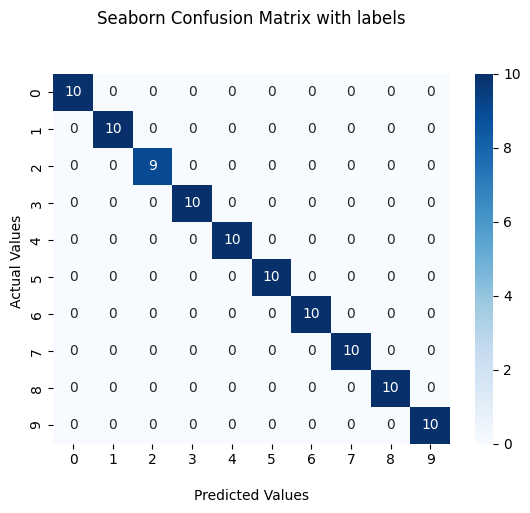

In [58]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.yaxis.set_ticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Display the visualization of the Confusion Matrix.
plt.show()

### 59.Mask detection using MobilNetV2

In [59]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Input,MaxPooling2D
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                        zoom_range=.15,
                        width_shift_range=.2,
                        height_shift_range=.2,
                        shear_range=.15,
                        horizontal_flip=True)

In [ ]:
baseModel = MobileNetV2(include_top=False,input_tensor=Input(shape=(224,224,3)))

headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(3,3))(headModel)
headModel = Flatten(name='flatten')(headModel)
headModel = Dense(64,activation='relu')(headModel)
headModel = Dropout(.5)(headModel)
headModel = Dense(2,activation='softmax')(headModel)

model = Model(inputs = baseModel.input, outputs = headModel)
model.summary()

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
H = model.fit(aug.flow(train_x,train_y, batch_size=BS),validation_data=(test_x,test_y),epochs=EPOCHS,verbose=1)

In [ ]:
for l in model.layers:
    print(l.name, l.trainable)

In [ ]:
prediction = model.predict(test_x)
prediction = np.argmax(prediction,axis=1)

In [ ]:
print(classification_report(test_y.argmax(axis=1),prediction,target_names = lb.classes_))

In [ ]:
model.save('mask_detector.model',save_format='h5')

### 60.Mask Detection in real time usine Caffe model and MobilNet

In [ ]:
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import imutils
import time

def detect_and_predict_mask(frame, faceNet, maskNet):
    # grab the dimensions of the frame and then construct a blob
    # from it
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224), #Scaling image to 0-1, swape BGR to RGB by default
        (104.0, 177.0, 123.0)) # mean for imageNet RGB

    # pass the blob through the network and obtain the face detections
    faceNet.setInput(blob)
    detections = faceNet.forward() #train and return detection
    print(detections.shape)

    # initialize our list of faces, their corresponding locations,
    # and the list of predictions from our face mask network
    faces = []
    locs = []
    preds = []

    # loop over the detections
    for i in range(0, detections.shape[2]): # contain 4 dimensions top left ,buttom right
        # extract the confidence (i.e., probability) associated with
        # the detection
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the confidence is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for
            # the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # extract the face ROI, convert it from BGR to RGB channel
            # ordering, resize it to 224x224, and preprocess it
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

            # add the face and bounding boxes to their respective
            # lists
            faces.append(face)
            locs.append((startX, startY, endX, endY))

    # only make a predictions if at least one face was detected
    if len(faces) > 0:
        # for faster inference we'll make batch predictions on *all*
        # faces at the same time rather than one-by-one predictions
        # in the above `for` loop
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)

    # return a 2-tuple of the face locations and their corresponding
    # locations
    return (locs, preds)

# load our serialized face detector model from disk
prototxtPath = r"Face-Mask-Detection-master\face_detector\deploy.prototxt"
weightsPath = r"Face-Mask-Detection-master\face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
maskNet = load_model("mask_detector.model")

# initialize the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
    frame = vs.read()
    frame = imutils.resize(frame, width=400)

    # detect faces in the frame and determine if they are wearing a
    # face mask or not
    (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

    # loop over the detected face locations and their corresponding
    # locations
    for (box, pred) in zip(locs, preds):
        # unpack the bounding box and predictions
        (startX, startY, endX, endY) = box
        (mask, withoutMask) = pred

        # determine the class label and color we'll use to draw
        # the bounding box and text
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # include the probability in the label
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        # display the label and bounding box rectangle on the output
        # frame
        cv2.putText(frame, label, (startX, startY - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

    # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()